In [12]:
import pandas as pd
data = pd.read_csv('iBeacon_RSSI_Unlabeled.csv')
data=data.dropna(how="all")
data=data.drop(['location','date'],axis=1)
# display the first 5 rows
data.head(12)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200
5,-200,-200,-200,-200,-81,-62,-200,-200,-200,-200,-200,-200,-200
6,-200,-200,-200,-200,-81,-61,-200,-200,-200,-200,-200,-200,-200
7,-200,-200,-200,-200,-81,-58,-200,-200,-200,-200,-200,-200,-200
8,-200,-200,-200,-200,-80,-58,-200,-200,-200,-200,-200,-200,-200
9,-200,-200,-200,-200,-80,-59,-76,-200,-200,-200,-200,-200,-200


In [15]:
from sklearn.cluster import DBSCAN
import numpy as np
datamat=data.values
X= np.array(datamat[:,:])
print(X)
from sklearn.manifold import TSNE

tsne=TSNE(learning_rate=120)
transformed=tsne.fit_transform(X)
x_axis=transformed[:,0]
y_axis=transformed[:,1]




[[-200 -200  -80 ... -200 -200 -200]
 [-200 -200  -80 ... -200 -200 -200]
 [-200 -200  -81 ... -200 -200 -200]
 ...
 [ -81 -200 -200 ... -200 -200 -200]
 [ -81 -200 -200 ... -200 -200 -200]
 [ -81 -200 -200 ... -200 -200 -200]]


In [16]:
x_axis.shape

(5191,)

In [21]:
y = DBSCAN(eps=0.8,min_samples =40).fit_predict(X)#分类结果
y

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

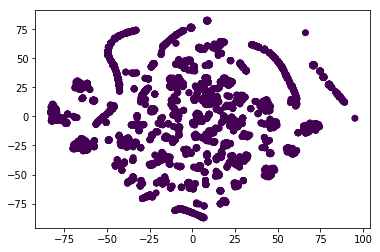

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(x_axis, y_axis, c=y)
plt.show()

In [29]:
from sklearn.cluster import KMeans
y = KMeans(n_clusters=104, random_state=0).fit_predict(X)
y

array([92, 16, 16, ..., 12, 12, 12])

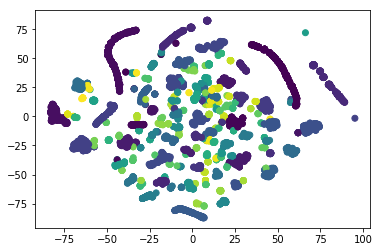

In [30]:
plt.scatter(x_axis, y_axis, c=y)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

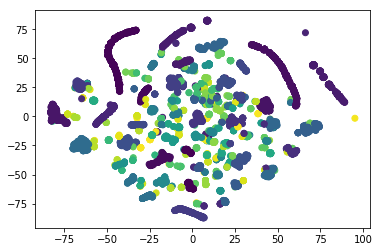

In [39]:
from sklearn.mixture import GMM
y = GMM(n_components=104).fit_predict(X)
y
plt.scatter(x_axis, y_axis, c=y)
plt.show()

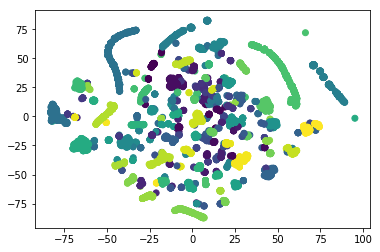

In [33]:
from sklearn.cluster import AgglomerativeClustering
y= AgglomerativeClustering( n_clusters=104).fit_predict(X)
y
plt.scatter(x_axis, y_axis, c=y)
plt.show()